## Load a sample of crime data
Datasets used in this class are from Seattle or San Francisco. Here I am first loading a small sample of the data to better understand how it is structured, and what patterns might be present

[data source](https://github.com/djq/datasci_course_materials/blob/master/assignment6/crimeanalytics.md)



In [99]:
# set working directory
data = '/Users/djq/repos/jupyter-notebooks/communicating-data-science/week1/data'
setwd(data)

# load data
seattle <- read.csv('seattle_incidents_summer_2014.csv', stringsAsFactors=F)

# what fields are in dataset?
head(seattle)

,RMS.CDW.ID,General.Offense.Number,Offense.Code,Offense.Code.Extension,Offense.Type,Summary.Offense.Code,Summarized.Offense.Description,Date.Reported,Occurred.Date.or.Date.Range.Start,Occurred.Date.Range.End,Hundred.Block.Location,District.Sector,Zone.Beat,Census.Tract.2000,Longitude,Latitude,Location,Month,Year
1,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.301,-122.3647,47.68252,"(47.68252427, -122.364671996)",6,2014
2,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1,-122.2771,47.6399,"(47.639900761, -122.277080248)",6,2014
3,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,,81XX BLOCK OF 11 AV SW,F,F3,11300.5,-122.3493,47.52923,"(47.529232299, -122.349312181)",8,2014
4,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,,6XX BLOCK OF PINE ST,M,M2,8200.1,-122.3348,47.61237,"(47.612368448, -122.334817763)",6,2014
5,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.202,-122.3294,47.68596,"(47.685959879, -122.329378505)",6,2014
6,480485,2015904103,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/19/2015 02:55:00 PM,06/19/2014 02:45:00 PM,07/10/2014 02:45:00 PM,35XX BLOCK OF S FERDINAND ST,R,R3,10300.4,-122.2875,47.55785,"(47.557854802, -122.287477902)",6,2014


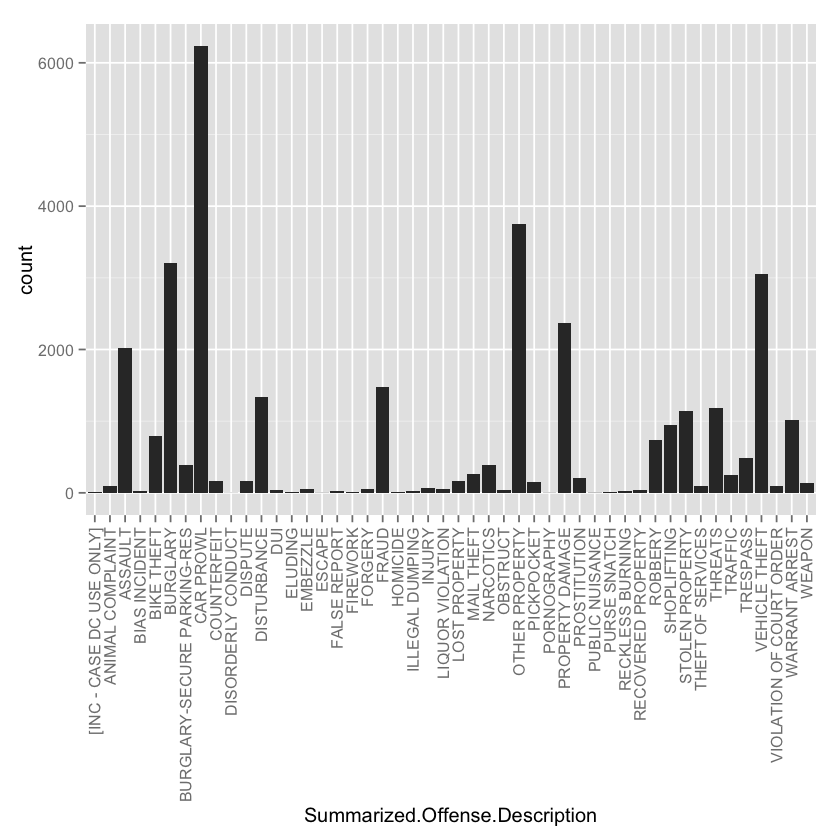

In [100]:
# lets explore how frequently these occur in our sample by examining them visually
library(ggplot2)

# show a histogram of sample data
c <- ggplot(seattle, aes(x = Summarized.Offense.Description)) 
c + geom_histogram() + theme(axis.text.x  = element_text(angle=90, hjust=1, vjust=0.5))


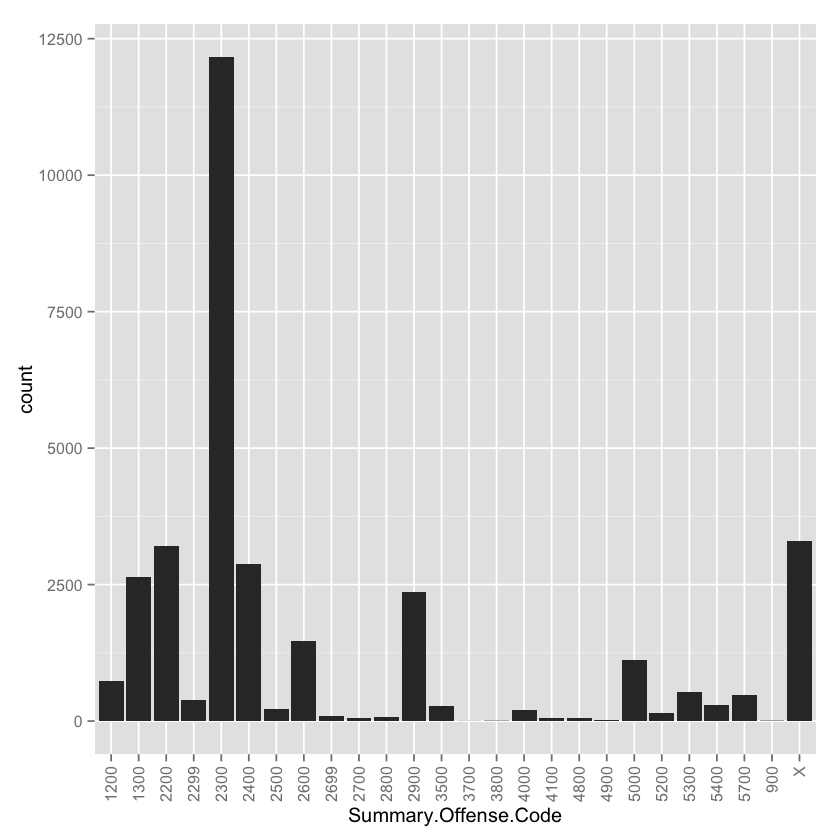

In [101]:
# as the overall crime cateorization is quite specific, let's use the Summary.Offense.Code which is more general
c <- ggplot(seattle, aes(x = Summary.Offense.Code)) 
c + geom_histogram() + theme(axis.text.x  = element_text(angle=90, hjust=1, vjust=0.5))


In [102]:
# let's explore what these specific crime codes are
codes <- data.frame(code = seattle$Summary.Offense.Code, description = seattle$Summarized.Offense.Description)

# and reduce these to unique values
codes <- unique(codes)

# focus on a specific type of theft
theft_code <- c('2300')

In [103]:
# focusing just on crime reports that correctly use the theft code 2300
subset(codes, code %in% theft_code)

,code,description
3,2300,MAIL THEFT
5,2300,OTHER PROPERTY
17,2300,CAR PROWL
63,2300,PICKPOCKET
99,2300,BIKE THEFT
472,2300,SHOPLIFTING
744,2300,VEHICLE THEFT
2248,2300,PURSE SNATCH


In [104]:
# now subset Seattle data to use this theft criteria
seattle_theft <- subset(seattle, Summary.Offense.Code %in% theft_code)

In [105]:
# explore these thefts by sector
# a list of sectors is shown here
# http://spdblotter.seattle.gov/2015/01/27/spd-adds-supervisors-shifts-police-beats-as-part-of-reform-efforts/

# first examine how many sectors exist in this data set
unique(seattle_theft$District.Sector)
seattle_theft$count <- 1

# aggregate data by sector
# seattle_theft_sector <- aggregate(seattle_theft$count, by=list(seattle_theft$District.Sector), FUN=sum)
# colnames(seattle_theft_sector) <- c('sector', 'thefts')
# seattle_theft_sector

[1] "F"  "J"  "R"  "Q"  "N"  "B"  "S"  "W"  "D"  "E"  "K"  "L"  "C"  "U"  "G" 
[16] "M"  "O"  ""   "99"

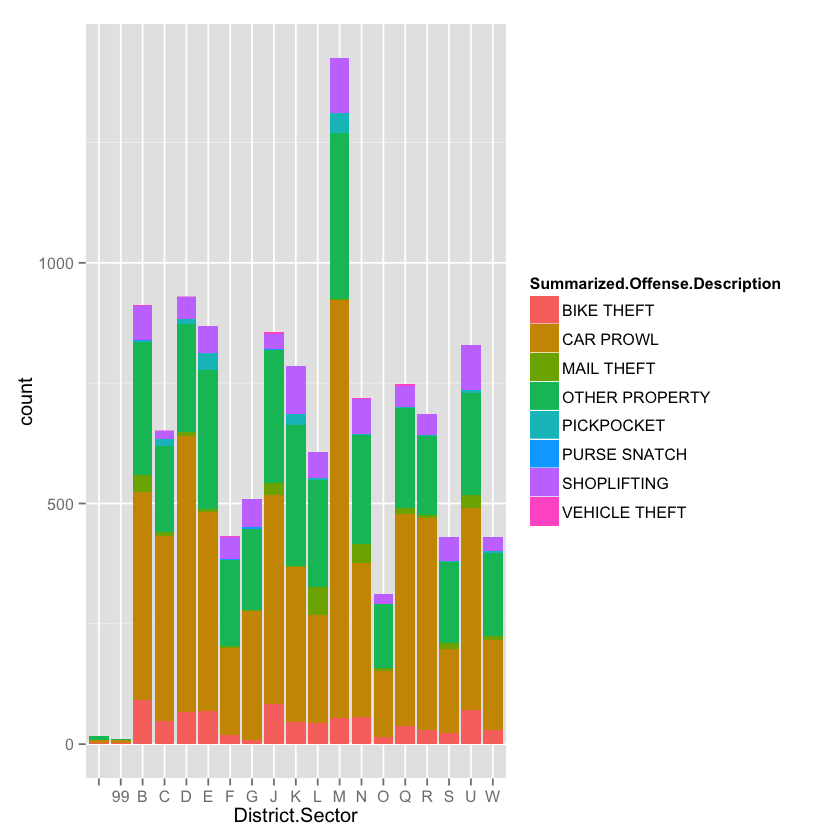

In [106]:
# plot thefts per sector, and color each bar by theft type
ggplot(seattle_theft, aes(District.Sector, fill=Summarized.Offense.Description)) + geom_bar()

In [107]:
# Do thefts vary by time of day?
# Here we are only going to use the 'Occurred.Date.or.Date.Range.Start'. While a theft could take place over time, 
# it seems most interesting to examine when the theft started

# tidy up date / timestamps. Here we can chop out the day as we are just interested in the hour
library(lubridate)

# the date/time is structured as follows
# 06/28/2014 10:31:00 AM
seattle_theft$crime_time <- mdy_hms(seattle_theft$Occurred.Date.or.Date.Range.Start, tz="America/Los_Angeles")

# also encode the hour that the crime occurred at
seattle_theft$hour <- hour(seattle_theft$crime_time)

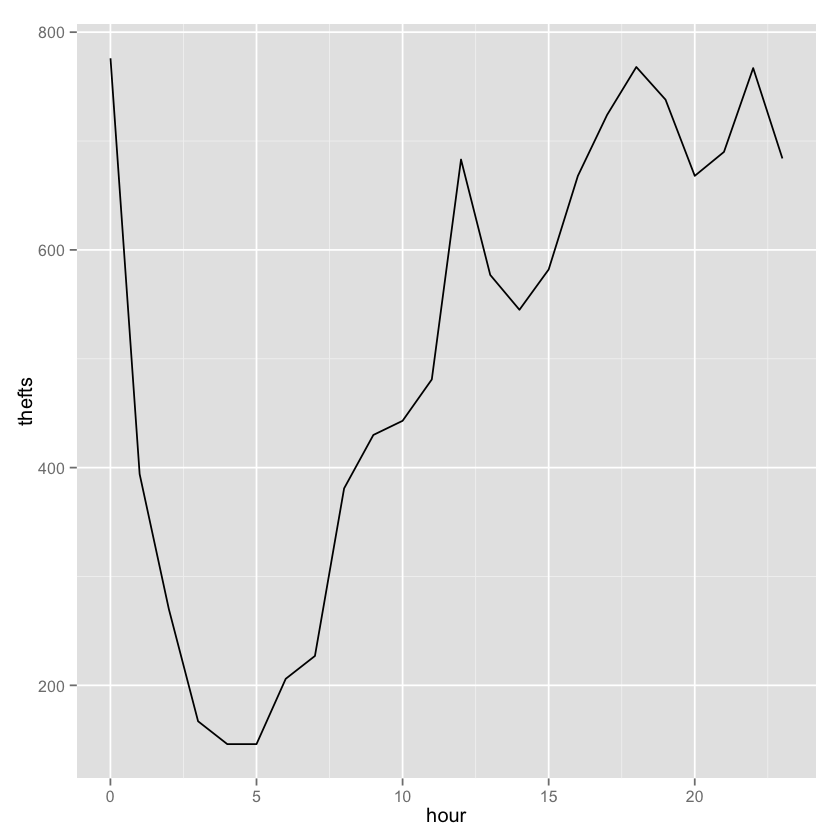

In [108]:
# lets also explore what the break down of these crimes is per sector, and also per time, aggregating all crimes per hour
seattle_theft_hourly <- aggregate(seattle_theft$count, by=list(seattle_theft$hour), FUN=sum)
colnames(seattle_theft_hourly) <- c('hour', 'thefts')
ggplot(seattle_theft_hourly, aes(y=thefts, x=hour)) + geom_line()

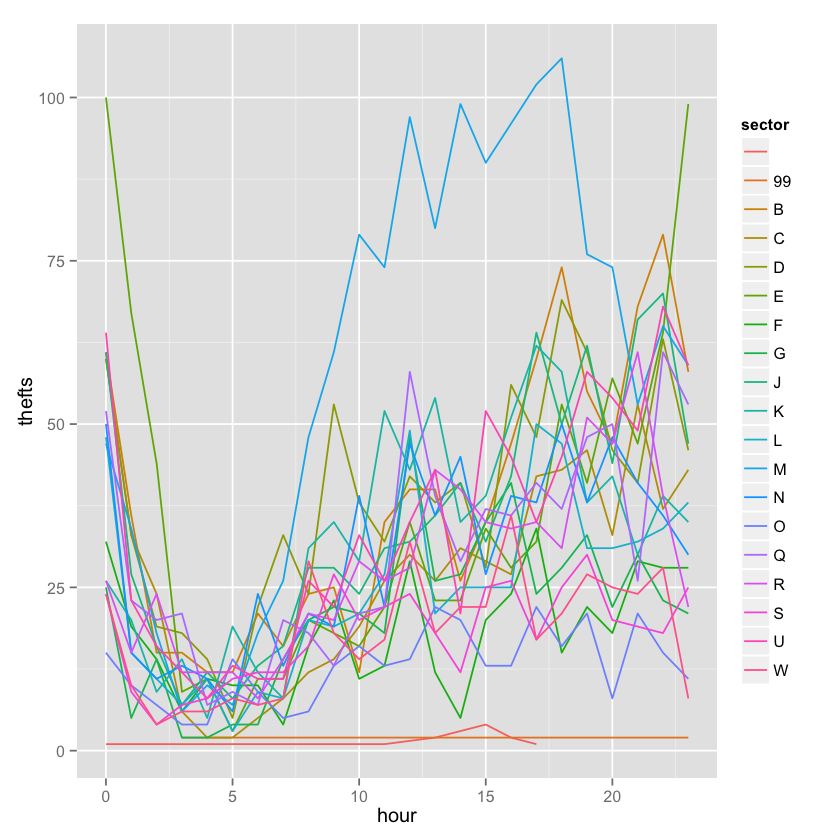

In [112]:
# aggregate thefts per hour and per sector 
seattle_theft_hourly_sector <- aggregate(seattle_theft$count, by=list(seattle_theft$hour, seattle_theft$District.Sector), FUN=sum)
colnames(seattle_theft_hourly_sector) <- c('hour', 'sector', 'thefts')
ggplot(seattle_theft_hourly_sector, aes(y=thefts, x=hour, color=sector)) + geom_line()

It's hard to decipher patterns between individual sectors, but we can see that there is one sector (represented by a blue line) that is behaving very differently compared to all others. Let's plot the data using a different approach to identify that sector.

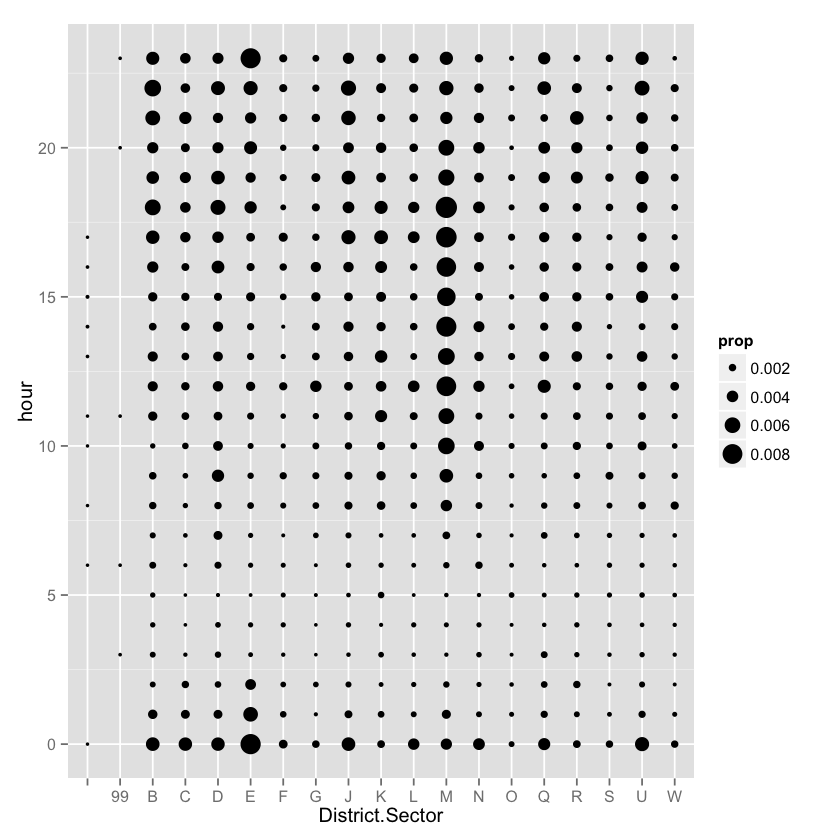

In [110]:
# aggregating data by hour, scale circle size by total proportion of crimes for that hour/sector
ggplot(seattle_theft, aes(x=District.Sector, y=hour)) + stat_sum(aes(group=count))

This chart clearly illustrates that Sector M has a distinct pattern of behavior as many crimes are occuring much earlier in the day. We can now see a few time "hotspots" when crimes of theft are more likely to occur. Sector M is an interesting case, as it shows that there are a lot of thefts occuring during the day. 

Finally, let's plot the crimes by each sector, per day, per time

,hour,sector,description,thefts
1,14,,BIKE THEFT,1
2,15,,BIKE THEFT,1
3,6,99,BIKE THEFT,2
4,0,B,BIKE THEFT,6
5,1,B,BIKE THEFT,5
6,3,B,BIKE THEFT,1
7,4,B,BIKE THEFT,2
8,5,B,BIKE THEFT,3
9,6,B,BIKE THEFT,1
10,7,B,BIKE THEFT,2


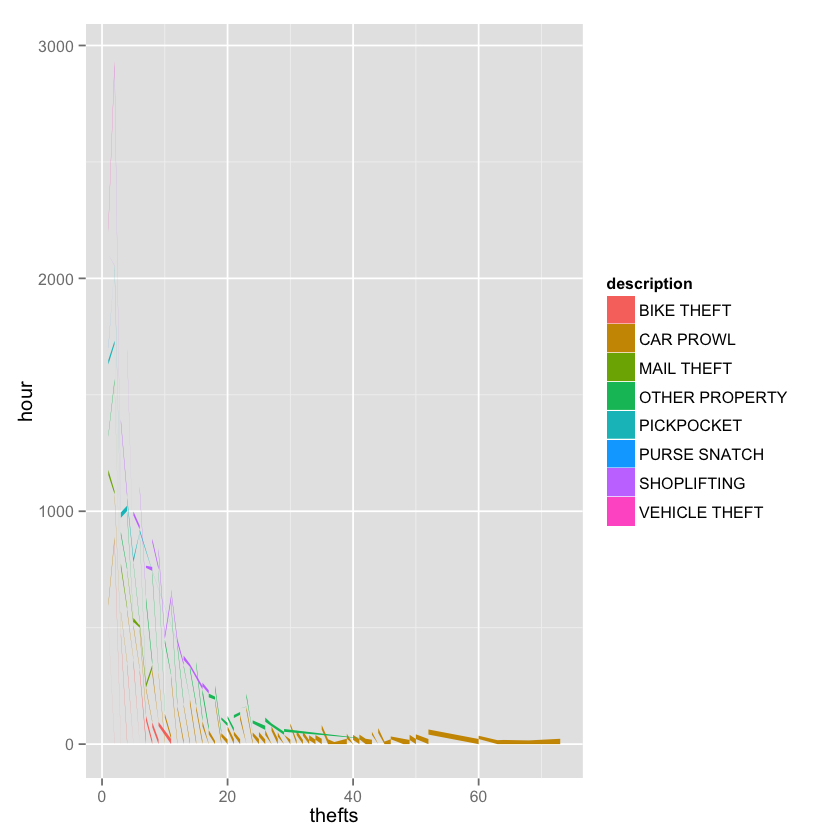

In [135]:
# aggregate thefts per hour, per sector and per crime type
seattle_theft_hourly_sector_type <- aggregate(seattle_theft$count, by=list(seattle_theft$hour, seattle_theft$District.Sector, seattle_theft$Summarized.Offense.Description), FUN=sum)
colnames(seattle_theft_hourly_sector_type) <- c('hour', 'sector', 'description','thefts')
ggplot(seattle_theft_hourly_sector_type, aes(x=thefts, y=hour, group=description, fill=description)) + geom_area(position = 'stack')
seattle_theft_hourly_sector_type

# colnames(seattle_theft_sector) <- c('sector', 'thefts')
# seattle_theft_sector

# first examining the crimes per hour (aggregated for one day)
#ggplot(seattle_theft, aes(y=count, x=hour, fill=Summarized.Offense.Description, group=Summarized.Offense.Description)) + geom_area(position = 'stack')
#ggplot(seattle_theft, aes(y=count, x=hour, group=Summarized.Offense.Description)) + geom_line(aes(colour=Summarized.Offense.Description))
